В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [1]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

In [50]:
url1 = 'https://drive.google.com/file/d/1BbZ_EEbDXhxYcLVFSR1VhJ_m7qJe3DIE/view?usp=share_link'
first = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
df = pd.read_csv(first)
df_copy = pd.read_csv(first)

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [51]:
df.sample(20)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
8342,United States of America,US,NaN,No,jobs.monster.com,Are you interested in a job as a LOA Specialis...,LOA Specialist Job in Denver,Full Time Temporary/Contract/Project,"Denver, CO 80249",NaN,http://jobview.monster.com/loa-specialist-job-...,NaN,Customer Support/Client Care,9288af750516e1ef8951f603b5d2b15e
5313,United States of America,US,NaN,No,jobs.monster.com,Company Description AXA is a leading financial...,Real Estate Investments Attorney Job in Ny,Full Time,"Ny, New York",Legal Services,http://jobview.monster.com/Real-Estate-Investm...,NaN,NaN,7fd4b2b1b6c8ea25c432bbe275e034c0
16888,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 686978Position: Networ...,Network Analyst Job in Cincinnati,Full Time Employee,Job Description Job #: 686978Position: Networ...,Computer/IT Services,http://jobview.monster.com/network-analyst-job...,NaN,Experienced (Non-Manager),ac40ef8f870def46b86c62de3c79e600
9815,United States of America,US,NaN,No,jobs.monster.com,Description:An exciting and new opportunity fo...,Diesel Truck Mechanic Job in Buffalo,Full Time Employee,"Buffalo, NY",Other/Not Classified,http://jobview.monster.com/Diesel-Truck-Mechan...,NaN,NaN,be3a333c9621403e089402f980bf49f3
3224,United States of America,US,NaN,No,jobs.monster.com,Surgical Care Affiliates (S.C.A) was launched ...,IT Internal Auditor Job in Birmingham,Full Time Employee,"Birmingham, AL 35209",Healthcare Services,http://jobview.monster.com/IT-Internal-Auditor...,NaN,IT/Software Development,a4b8e3cf0e4a0c02330d8de4dd3eba45
13647,United States of America,US,NaN,No,jobs.monster.com,Software Development Engineer in Test (SDET)ZY...,Software Development Engineer in Test (SDET) J...,Full Time,"Lindon, UT 84042",Healthcare Services,http://jobview.monster.com/Software-Developmen...,NaN,Experienced (Non-Manager),5d2799c68a9905d46607095f029df541
15330,United States of America,US,NaN,No,jobs.monster.com,DO YOU KNOW GLACIER WATER? We are a fast growi...,Service Technician/Route (Water-Vending Equipm...,Full Time Employee,"Santa Rosa, CA",Food and Beverage Production,http://jobview.monster.com/service-technician-...,16.00 - 17.00 $ /hour,Installation/Maintenance/Repair,a2ea7ebd69c92ae58fa95027f6f0be6f
364,United States of America,US,NaN,No,jobs.monster.com,Provides respiratory therapy modalities per pr...,P/D Advanced Respiratory Care Practitioner Job...,"Per Diem, Employee","Las Vegas, NV",Healthcare Services,http://jobview.monster.com/p-d-advanced-respir...,NaN,Medical/Health,2e39a794c0a3ac1f15dc7072d3cb5521
6117,United States of America,US,NaN,No,jobs.monster.com,12B Combat Engineer - Construction and Enginee...,B Combat Engineer - Construction and Engineeri...,Full Time Employee,"Napoleonville, LA 70390",NaN,http://jobview.monster.com/12b-combat-engineer...,NaN,Entry Level,2ee10dc0fa4cc7b4818ef63f17332660
7074,United States of America,US,NaN,No,jobs.monster.com,Executive Placement Partners is most pleased t...,Brewery Seeking Manager and VP of Operations...,"Full Time, Employee","Columbia, TN 38401",Restaurant/Food Services,http://jobview.monster.com/brewery-seeking-1-m...,NaN,Food Services/Hospitality,29b565b3629bff3d322ffa5a0f6f2b39


In [52]:
df.dtypes

country            object
country_code       object
date_added         object
has_expired        object
job_board          object
job_description    object
job_title          object
job_type           object
location           object
organization       object
page_url           object
salary             object
sector             object
uniq_id            object
dtype: object

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

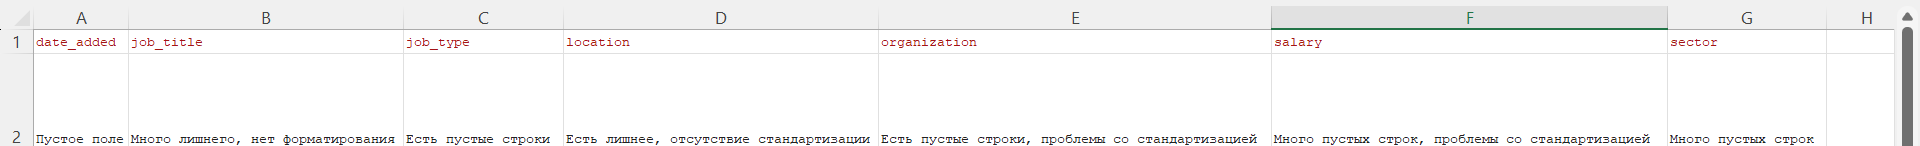

In [53]:
n = df.isna().sum()
print(n)


country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64


<Axes: >

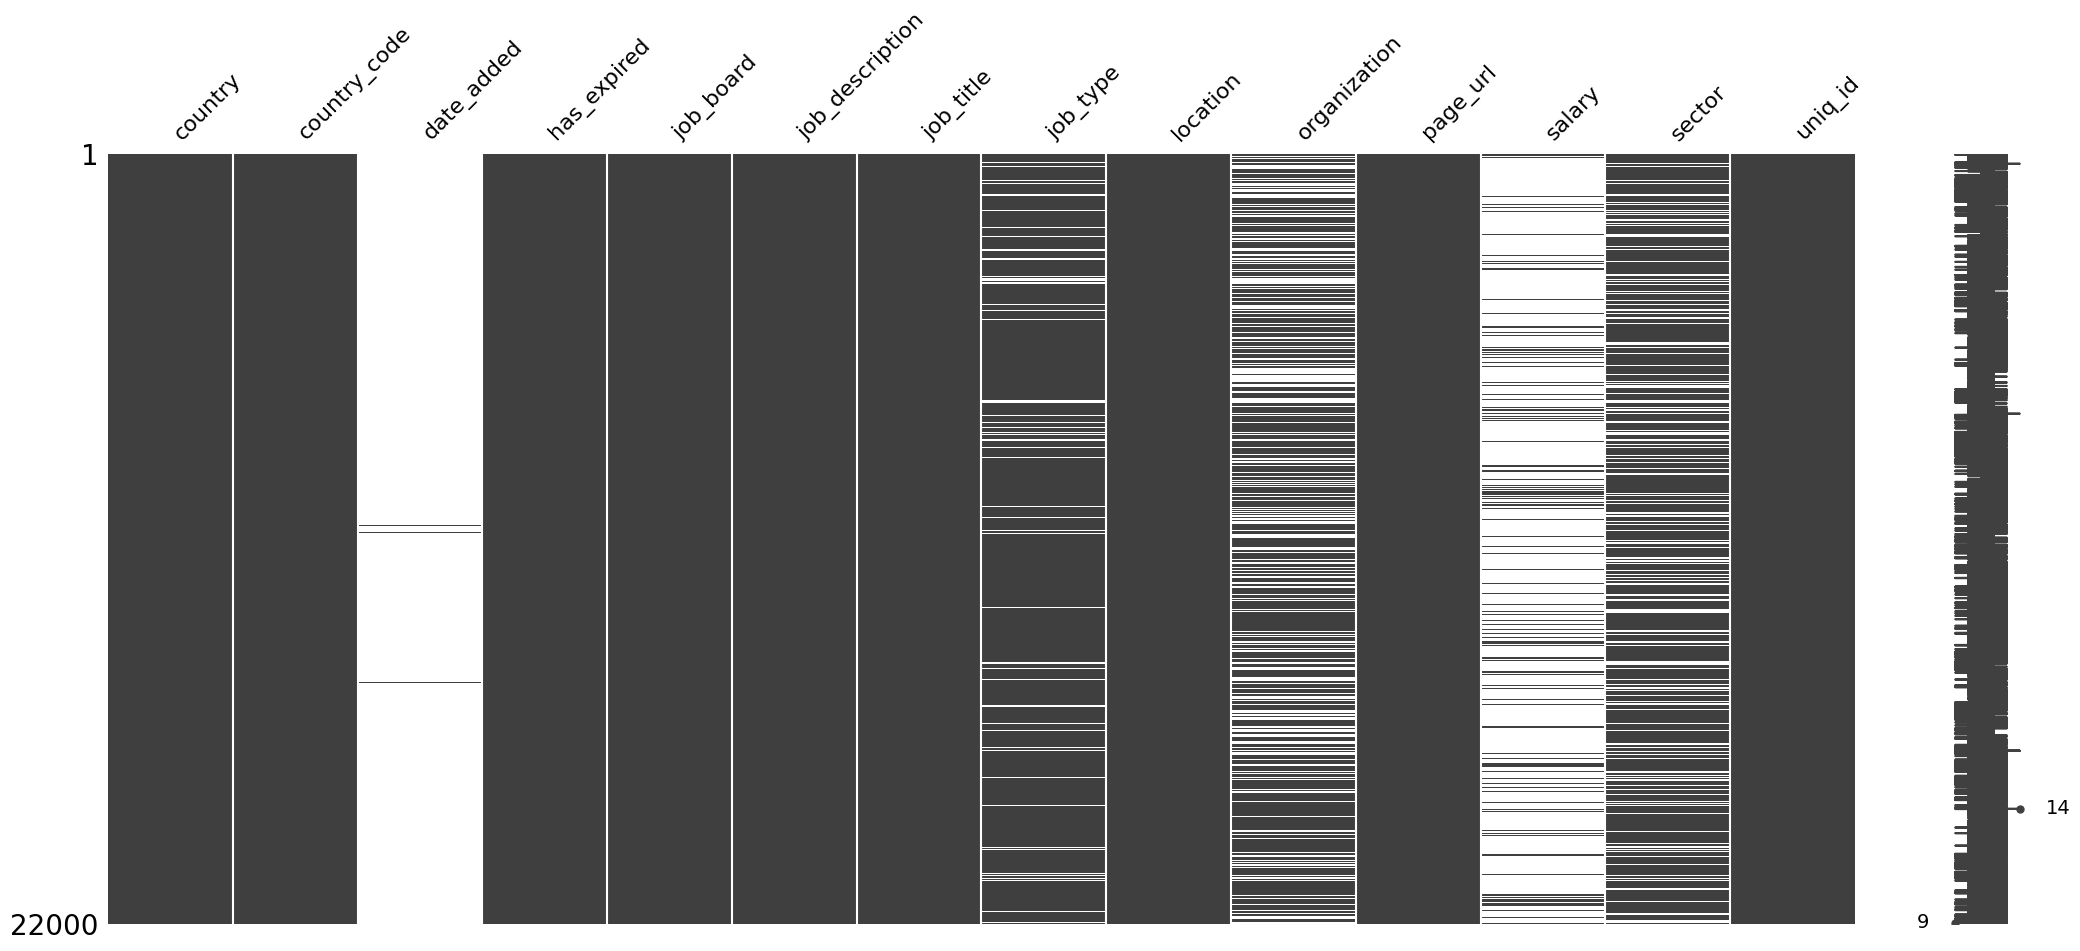

In [54]:
msno.matrix(df)

<Axes: >

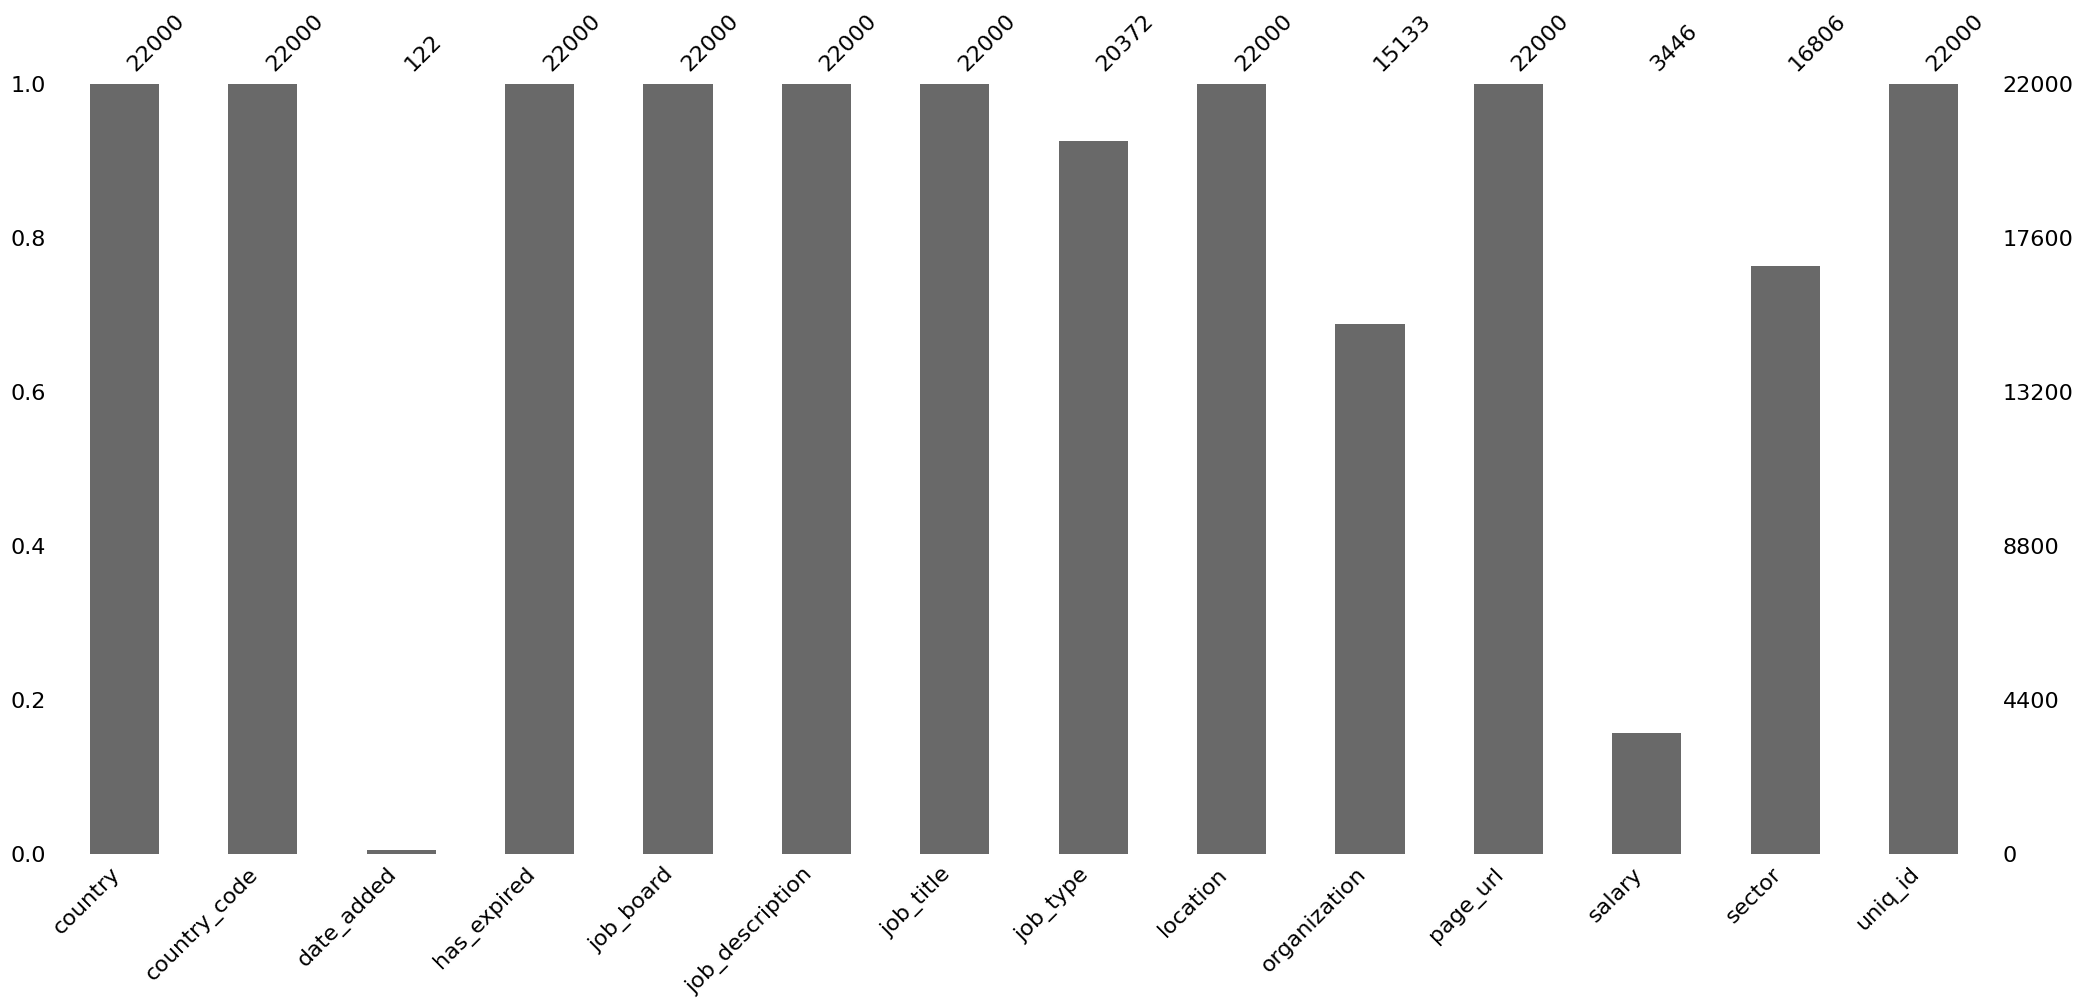

In [55]:
msno.bar(df)

In [56]:
df_n = df.dropna()

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [57]:
df.shape

(22000, 14)

In [58]:
df_n.shape

(5, 14)

Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

**1**

In [59]:
df.nunique()

country                1
country_code           1
date_added            78
has_expired            1
job_board              1
job_description    18744
job_title          18759
job_type              39
location            8423
organization         738
page_url           22000
salary              1737
sector               163
uniq_id            22000
dtype: int64

**Да, 4 столбца: country, country_code, has_expired, job_board. Их можно удалить так как они полностью бесполезны**

**2**

In [60]:
df[df['job_description'] == df['job_title']]

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
303,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Shaffer Trucking, IncGretna, LA",NaN,http://job-openings.monster.com/monster/d687c9...,NaN,NaN,8b76720fe70edd9e7f48ff2742def465
305,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Boyd Bros.KENNER, LA",NaN,http://job-openings.monster.com/monster/459c91...,NaN,NaN,a43b5a31136e96afc06c3899e20043e4
307,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Rooms To GoMetairie, LA",NaN,http://job-openings.monster.com/monster/8284d2...,NaN,NaN,c6a5a61d9cd05fca25b93705b9e66335
392,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Mondelez InternationalKnoxville, TN",NaN,http://job-openings.monster.com/monster/1584bf...,NaN,NaN,97e230c230ab4487572b29971a217130
4208,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Wellspan HealthYork, PA",NaN,http://job-openings.monster.com/monster/aa27a2...,NaN,NaN,e7a4aedac9dcade8c42579b70768d399
4459,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Premier TransportationChattanooga, TN",NaN,http://job-openings.monster.com/monster/7e8794...,NaN,NaN,36ac85b751e19f6debca4e94f34f5539
4461,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Ozark Motor LinesChattanooga, TN",NaN,http://job-openings.monster.com/monster/e77c51...,NaN,NaN,85a9d37cc9bef1560215d43ddb885cc8
4462,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Summitt Trucking, LLCChattanooga, TN",NaN,http://job-openings.monster.com/monster/dfd62a...,NaN,NaN,d24043783a4fcf91b9b7518aa1495a98
4463,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"SchneiderChattanooga, TN",NaN,http://job-openings.monster.com/monster/3e6ee0...,NaN,NaN,7a236d8d1a98651b09c2ea3b1a11a3d5
4465,United States of America,US,NaN,No,jobs.monster.com,Please apply only if you are qualified.,Please apply only if you are qualified.,NaN,"Morgan Van LinesChattanooga, TN",NaN,http://job-openings.monster.com/monster/b8dd3d...,NaN,NaN,e1781e4948c4afdc910c3d9430a8a49f


**Да, просмотрев данные, можно понять что только близкие по содержанию столбцы могут содержать такие же данные тольков в job_title and job_description**

**3**

**Некоторые из столбцов, такие как country, country code, has_expired и job_board, не несут полезной информации и представляются очевидными. Мы исследуем эту проблему в контексте анализа данных для Monster.com в США. Кроме того, столбец has_expired содержит только одно значение - NO, что делает его бесполезным для дальнейшего использования. Следовательно, нет необходимости включать эти столбцы в анализ.**

#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [61]:
df.nunique()

country                1
country_code           1
date_added            78
has_expired            1
job_board              1
job_description    18744
job_title          18759
job_type              39
location            8423
organization         738
page_url           22000
salary              1737
sector               163
uniq_id            22000
dtype: int64

**uniq_id и page_url полностью уникальные - по ним можно полностью идентифицировать запись в датасете. Но в них нет совпадений**

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

In [62]:
# Удаление нерелевантных столбцов и столбцов с пустыми ячейками
df=df.drop(['country','country_code','job_board','has_expired','date_added'], axis=1)

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [63]:
df.location.value_counts().to_frame()

,location
"Dallas, TX",646
"Cincinnati, OH",384
"Columbus, OH",345
"Camphill, PA",333
"Dallas, TX 75201",304
...,...
"Audubon, PA 19403",1
"Goshen, IN",1
"Cheektowaga, NY 14225",1
"Northport, AL 35476",1


**Есть город+штат+индекс; индекс; штат; данные которые перепутали с каким-то столбцом и вписали какой-то текст; город+штат; город+индекс**

На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

In [64]:
df[(df['location'].str.match(r'^[A-Za-z\s]+\d{5}$'))]

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
16,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...,c43a1fc560511962321dbf21df14fe49
22,We're looking for team players to provide cons...,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,http://jobview.monster.com/Combat-Engineer-Con...,NaN,General/Other: Engineering,d1d9bcc6830e358f4a1f8c42a677cbb6
85,As a Technical Engineer in the Army National G...,Technical Engineer Job in Columbus body { mar...,NaN,Columbus 68601,NaN,http://jobview.monster.com/Technical-Engineer-...,NaN,Civil & Structural EngineeringGeneral/Other: E...,14f47f78f937d8eac5da2e80f6736461
104,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Gales...,NaN,Galesburg 64101,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...,48eb6c3a1017be50ec8328f2caec120a
108,As a Technical Engineer in the Army National G...,Technical Engineer Job in Edinburgh body { ma...,NaN,Edinburgh 46124,NaN,http://jobview.monster.com/Technical-Engineer-...,NaN,Civil & Structural EngineeringGeneral/Other: E...,d7bfc34ed82b71c885a2f37dd7790d92
...,...,...,...,...,...,...,...,...,...
21062,Report this job About the Job Medical secretar...,CHAPMAN & ASSOCIATES Job Application for Medic...,"Full Time, Employee",Address 21502,Healthcare Services,http://jobview.monster.com/medical-secretary-j...,NaN,NaN,5303c1fdf0a003856040009541ca179c
21088,Title: HVAC ... Service Tech / Mechanic / Inst...,HVAC ... Service Tech / Mechanic / Installer /...,Full Time,Oklahoma City 73115,All,http://jobview.monster.com/hvac-service-tech-m...,NaN,Experienced (Non-Manager),4d96e3fade3f33abd015f30c90641bb5
21108,Are you looking for a customer service positio...,Member Care Representatives Needed/Customer Se...,Full Time Employee,Columbus 43251,Insurance,http://jobview.monster.com/member-care-represe...,14.00 - 14.00 $ /hour,NaN,543d0b8b0c28d6c333f8bb6cf236d52a
21250,Randstad Professionals is working with our cli...,Accounting Assoicate Job in Philadelphia body...,Full Time Temporary/Contract/Project,Philadelphia 19102,Accounting and Auditing Services,http://jobview.monster.com/Accounting-Assoicat...,NaN,Human Resources,a56f3408b542763beac19f40e5835639


In [65]:
df_valid =df[(df['location'].str.match(r'^[A-Za-z\s]+,\s[A-Z]{2}$')) | (df['location'].str.match(r'^[A-Za-z\s]+\s*,\s*[A-Z]{2}\s+\d{5}$'))]

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

In [66]:
def format(x):
    if x.str.match(r'^[A-Za-z\s]+,\s[A-Z]{2}$').all():
        return 'город+штат'
    elif x.str.match(r'^[A-Za-z\s]+\s*,\s*[A-Z]{2}\s+\d{5}$').all():
        return 'город+штат+индекс'
    elif x.str.match(r'^[A-Z]{2}$').all():
        return 'штат'
    elif x.str.match(r'^\d{5}$').all():
        return 'индекс'
    elif x.str.match(r'^[A-Za-z\s]+\d{5}$').all():
        return 'город+индекс'
    else:
        return 'oстальные'
  

df['format'] = df['location'].apply(lambda x: format(pd.Series(x)))

In [67]:
df_loc = df.groupby(['format'], as_index=False).agg({'uniq_id':'count'})

In [68]:
df_loc

,format,uniq_id
0,oстальные,2728
1,город+индекс,348
2,город+штат,7112
3,город+штат+индекс,11328
4,индекс,254
5,штат,230


<Axes: xlabel='format'>

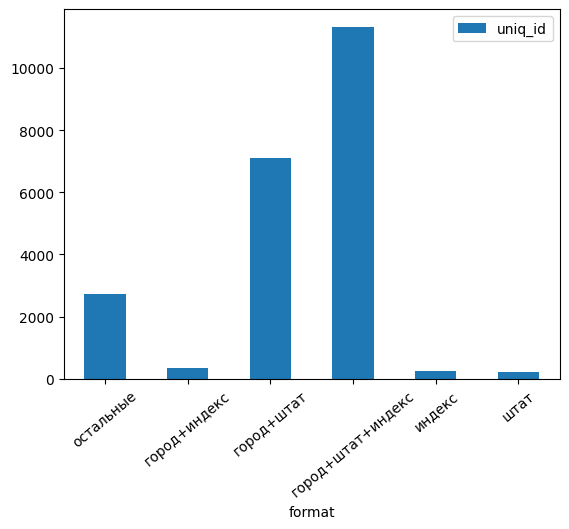

In [69]:
df_loc.plot.bar(x='format', y='uniq_id', rot=40)

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [70]:
df_not_valid = df[~(df['location'].str.match(r'^[A-Za-z\s]+,\s[A-Z]{2}$')) & ~(df['location'].str.match(r'^[A-Za-z\s]+\s*,\s*[A-Z]{2}\s+\d{5}$'))]

In [71]:
city = df_valid['location'].str.split(pat = ', ', n = 1, expand = True)
reg_ind = city[1].str.split(pat = ' ', expand = True)

In [72]:
reg_ind

,0,1
0,WI,53702
1,WI,53708
3,CA,None
4,PA,None
5,VA,None
...,...,...
21995,OH,None
21996,OH,45236
21997,IL,60602
21998,IL,60609


In [73]:
df_valid.insert(loc = 5, column = 'city', value = city[0])
df_valid.insert(loc = 6, column = 'reg', value = reg_ind[0])
df_valid.insert(loc = 7, column = 'ind', value = reg_ind[1])

In [74]:
df_valid

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,Madison,WI,53702,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,Madison,WI,53708,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,Dixon,CA,None,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,Camphill,PA,None,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
5,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,Charlottesville,VA,None,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66
...,...,...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,Cincinnati,OH,None,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,Cincinnati,OH,45236,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,Chicago,IL,60602,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",Chicago,IL,60609,http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [75]:
def city(x):
  if 'город+индекс' in x['format']:
    words = x['location'].split(' ')
    return ' '.join(words[:-1])

df_not_valid['city'] = df_not_valid.apply(city, axis=1)

<ipython-input-75-2b0299a3610c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_valid['city'] = df_not_valid.apply(city, axis=1)


In [76]:
def reg(x):
  if 'штат' in x['format']:
    return x['location'].split(' ')[0]

df_not_valid['reg'] = df_not_valid.apply(reg, axis=1)

<ipython-input-76-5e7eb345db4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_valid['reg'] = df_not_valid.apply(reg, axis=1)


In [77]:
def ind(x):
  if x['format'] == 'индекс':
    return x['location'].split(' ')[0]

df_not_valid['ind'] = df_not_valid.apply(reg, axis=1)

<ipython-input-77-df2cbe8c1a0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_valid['ind'] = df_not_valid.apply(reg, axis=1)


In [78]:
df_not_valid.head()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,format,city,reg,ind
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,oстальные,None,None,None
6,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN,455802d725fde67293970ab3953b1d39,oстальные,None,None,None
16,Airfields. Roads. Dams. Buildings. Name the pr...,Horizontal Construction Engineers Job in Wades...,NaN,Wadesboro 28170,NaN,http://jobview.monster.com/Horizontal-Construc...,NaN,Civil & Structural EngineeringGeneral/Other: E...,c43a1fc560511962321dbf21df14fe49,город+индекс,Wadesboro,None,None
22,We're looking for team players to provide cons...,Combat Engineer - Construction and Engineering...,NaN,La Porte 46350,NaN,http://jobview.monster.com/Combat-Engineer-Con...,NaN,General/Other: Engineering,d1d9bcc6830e358f4a1f8c42a677cbb6,город+индекс,La Porte,None,None
29,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing","Chicago, IL",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,779bb4c9bf038b7fb775134736d36fd4,oстальные,None,None,None


#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [79]:
df_valid = df_valid.dropna(subset=['salary'])

In [80]:
df_valid

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,Houston,TX,77098,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464
14,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,Houston,TX,None,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427
19,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,Carter Lake,IA,51510,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5
23,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,Denver,CO,80215,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c
30,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,Mounds View,MN,55112,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496
...,...,...,...,...,...,...,...,...,...,...,...,...
21987,Own Your TerritoryAsk yourself these questions...,Experienced Territory Sales,Full Time,"Chicago, IL 60602",NaN,Chicago,IL,60602,http://jobview.monster.com/Experienced-Territo...,"$80,000.00+ /year",Experienced (Non-Manager),a696d26d6db9c5abe572117b9483e847
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,Cincinnati,OH,None,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,Cincinnati,OH,45236,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",Chicago,IL,60609,http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

In [82]:
df_valid[df_valid['salary'].str.match(r'(\d+\.\d+)\s-\s(\d+\.\d+)\s\$\s/hour')].head(1)

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,Houston,TX,77098,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464


In [83]:
df_valid[df_valid['salary'].str.match(r'Up to\s\$\d{1,3}(?:,\d{3})*\.\d{2}')].head(1)

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
2630,Job Description:This Medical Admin Position Fe...,Medical Admin- FRONT Office - up to $/hr Job i...,Temporary/Contract/Project,"Los Angeles, CA 90068",Other/Not Classified,Los Angeles,CA,90068,http://jobview.monster.com/Medical-Admin-FRONT...,Up to $18.00,Experienced (Non-Manager),bf2c1a423224cb15e6981fd622919672


In [84]:
df_valid[df_valid['salary'].str.match(r'\$\d{1,3}(?:,\d{3})*\.\d{2}\+\s/year')].head(1)

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
132,The In-House Ad Agency/Creative Studio at our ...,Digital Copywriter Job in Fort Lauderdale,Full Time Temporary/Contract/Project,"Fort Lauderdale, FL",NaN,Fort Lauderdale,FL,None,http://jobview.monster.com/Digital-Copywriter-...,"$50,000.00+ /year",Editorial/Writing,0181c755c51a1f703573af03946e777c


In [85]:
df_valid[df_valid['salary'].str.match(r'\$\d+\.\d+\+\s*/hour')].head(1)

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
545,Unarmed Security Officer – Northern California...,Unarmed Security Officer- Northern California ...,Full Time,"Oakland, CA 94601",Security and Surveillance,Oakland,CA,94601,http://jobview.monster.com/unarmed-security-of...,$10.87+ /hour,Entry Level,16b5ee3186fac7d71ac4a5e1ed704b11


In [86]:
df_valid[df_valid['salary'].str.match(r'(\d{1,3}(?:,\d{3})*\.\d{2})\s-\s(\d{1,3}(?:,\d{3})*\.\d{2})\s\$\s/year')].head(1)

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
14,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,Houston,TX,None,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427


In [87]:
df_valid_yh = df_valid[~df_valid['salary'].str.match(r'Up to\s\$\d{1,3}(?:,\d{3})*\.\d{2}')]

In [88]:
df_valid_yh.head()

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,Houston,TX,77098,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464
14,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,Houston,TX,None,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427
19,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,Carter Lake,IA,51510,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5
23,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,Denver,CO,80215,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c
30,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,Mounds View,MN,55112,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496


In [89]:
def yh(x):
    if x.str.match(r'(\d+\.\d+)\s-\s(\d+\.\d+)\s\$\s/hour').all() or x.str.match(r'\$\d+\.\d+\+\s*/hour').all():
        return 'hour'
    else:
        return 'year'
  

df_valid_yh['yh'] = df_valid_yh['salary'].apply(lambda x: yh(pd.Series(x)))

<ipython-input-89-36bb29fe700e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_yh['yh'] = df_valid_yh['salary'].apply(lambda x: yh(pd.Series(x)))


<Axes: >

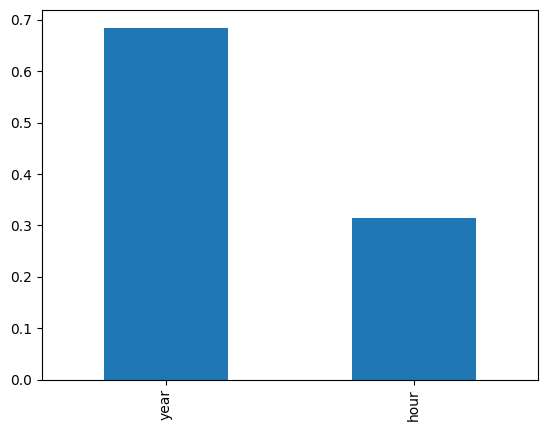

In [90]:
df_valid_yh['yh'].value_counts(normalize=True).plot.bar()

Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

**Зп в год указывается в 2 раза чаще чем в час**

**year и hour**

#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

<Axes: >

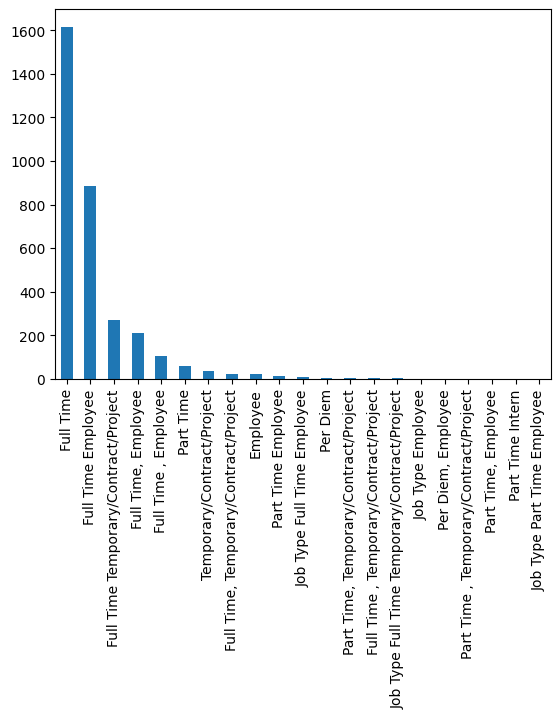

In [91]:
df_valid['job_type'].value_counts().plot.bar()

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [92]:
# Замена запятых на пустую строку
df_valid['job_type'] = df_valid['job_type'].str.replace(',', '')

# Извлечение данных с помощью регулярного выражения и удаление пропущенных значений
df_valid[['job', 'type']] = df_valid['job_type'].str.extract(r'^(\w+\s\w+)\W+(.+)').dropna()

<ipython-input-92-a22e2f8c35ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['job_type'] = df_valid['job_type'].str.replace(',', '')
<ipython-input-92-a22e2f8c35ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid[['job', 'type']] = df_valid['job_type'].str.extract(r'^(\w+\s\w+)\W+(.+)').dropna()
<ipython-input-92-a22e2f8c35ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [93]:
df

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,format
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,город+штат+индекс
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,город+штат+индекс
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,oстальные
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,город+штат
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,город+штат
...,...,...,...,...,...,...,...,...,...,...
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,город+штат
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,город+штат+индекс
21997,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,город+штат+индекс
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,город+штат+индекс


In [94]:
df_valid

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id,job,type
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,"Houston, TX 77098",Education,Houston,TX,77098,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464,NaN,NaN
14,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,Houston,TX,None,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427,Full Time,Employee
19,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,Carter Lake,IA,51510,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5,NaN,NaN
23,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,"Denver, CO 80215",NaN,Denver,CO,80215,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c,NaN,NaN
30,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,Mounds View,MN,55112,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496,Full Time,Temporary/Contract/Project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,Own Your TerritoryAsk yourself these questions...,Experienced Territory Sales,Full Time,"Chicago, IL 60602",NaN,Chicago,IL,60602,http://jobview.monster.com/Experienced-Territo...,"$80,000.00+ /year",Experienced (Non-Manager),a696d26d6db9c5abe572117b9483e847,NaN,NaN
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,Cincinnati,OH,None,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,NaN,NaN
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,Cincinnati,OH,45236,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,NaN,NaN
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",Chicago,IL,60609,http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,Full Time,Employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

In [95]:
df_valid['sector'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Experienced (Non-Manager)                914
Manager (Manager/Supervisor of Staff)    349
Entry Level                              250
Accounting/Finance/Insurance             222
Sales/Retail/Business Development        108
Name: sector, dtype: int64

In [96]:
jobtitle=df_valid['job_title'].str.split('Job')
df_valid['job_title']=jobtitle.str[0]

<ipython-input-96-a3b77fde9686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['job_title']=jobtitle.str[0]


In [97]:
df_valid['organization'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head()

Other/Not Classified        221
Manufacturing - Other       213
Healthcare Services         157
Restaurant/Food Services    154
Legal Services              115
Name: organization, dtype: int64

In [98]:
df_valid

,job_description,job_title,job_type,location,organization,city,reg,ind,page_url,salary,sector,uniq_id,job,type
13,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher,Full Time,"Houston, TX 77098",Education,Houston,TX,77098,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,b43c077756d5a326c4854e1399fd2464,NaN,NaN
14,Construction Professional For more than 15 yea...,Superintendent,Full Time Employee,"Houston, TX",Construction - Industrial Facilities and Infra...,Houston,TX,None,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,d8491fcefe14d1398de419984dccf427,Full Time,Employee
19,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,Carter Lake,IA,51510,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager),3bef462fc38d743c7fbce17cf50ee7d5,NaN,NaN
23,"Well respected, rapidly growing, and expandin...",Estimator - Construction,Full Time,"Denver, CO 80215",NaN,Denver,CO,80215,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,c552f63b5497f720942aaf943d629b1c,NaN,NaN
30,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,Mounds View,MN,55112,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN,c0eb639b58ad44ccc9791e2d44ad3496,Full Time,Temporary/Contract/Project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21987,Own Your TerritoryAsk yourself these questions...,Experienced Territory Sales,Full Time,"Chicago, IL 60602",NaN,Chicago,IL,60602,http://jobview.monster.com/Experienced-Territo...,"$80,000.00+ /year",Experienced (Non-Manager),a696d26d6db9c5abe572117b9483e847,NaN,NaN
21995,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller,Full Time,"Cincinnati, OH",NaN,Cincinnati,OH,None,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,NaN,NaN
21996,Luxury homebuilder in Cincinnati seeking multi...,Accountant,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,Cincinnati,OH,45236,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,NaN,NaN
21998,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",Chicago,IL,60609,http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,Full Time,Employee


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных. 
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

В начале был полный полный беспорядок, ненужные столбцы и много пропущенных значений. Я убрал бесполезные столбцы и строки, обработал столбцы, преобразовал в них данные в нужный формат, конечно, датафрейм не стал идеальным, но немного понятным - да 

Обработанный набор данных о вакансиях предоставляет возможность решения различных задач, включая следующие:

Используя обработанный набор данных о вакансиях, можно проводить анализ требований к соискателям, определяя наиболее значимые профессиональные компетенции и устанавливая соответствующие требования к кандидатам на основе информации о необходимых навыках, опыте работы и уровне образования.

Анализ рынка труда. Можно проанализировать спрос на различные профессии, уровень заработных плат, требования к кандидатам и т.д. Это поможет выявить дефицитные и перспективные профессии.



Основные этапы обработки датасета вакансий:

Предобработка. На этом этапе нужно очистить данные от шума, дубликатов, пропущенных значений. Также желательно привести все значения к единому формату. Например, унифицировать названия должностей, компаний, уровней образования и т.д.

Анализ данных. Нужно изучить общие статистические характеристики датасета, распределение значений по категориям и выявить тренды. Это позволит понять, какие модели и методы подходят для решения задач.

Визуализация. Наглядное представление данных поможет лучше понять рынок труда и выявить неочевидные закономерности. Можно строить графики, диаграммы, карты.

Машинное обучение. На основе данных можно обучать модели классификации, кластеризации, прогнозирования и другие. Это позволит решать задачи, описанные в первом вопросе.